In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xg
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
path = "C:/Workspace/Project/baron/05_Loop current Events"
file = ["2015-08-07","2015-08-08","2015-09-03","2015-09-09","2015-09-11"]
dfs = []
for i in range(5):
    filenames = glob.glob(path + "/" + file[i] + "/*.txt")
    cols = []
    for filename in filenames:
        cols.append(pd.read_csv(filename, index_col=None, header=None))
    df = pd.DataFrame(pd.concat(cols, axis=1, ignore_index=None))
    df.columns = ['AIRGAP1' , 'AIRGAP2' , 'AIRGAP3' , 'AIRGAP4' , 'CURRENT_DEPTH1' ,
              'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' , 'CURRENT_DEPTH5' ,
              'CURRENT_DEPTH6' , 'CURRENT_DEPTH7' , 'CURRENT_DIRECTION1' , 'CURRENT_DIRECTION2' , 
              'CURRENT_DIRECTION3' , 'CURRENT_DIRECTION4' , 'CURRENT_DIRECTION5' , 'CURRENT_DIRECTION6' , 
              'CURRENT_DIRECTION7' , 'CURRENT_SPEED1' , 'CURRENT_SPEED2' , 'CURRENT_SPEED3' , 'CURRENT_SPEED4' ,
              'CURRENT_SPEED5' , 'CURRENT_SPEED6' , 'CURRENT_SPEED7' , 'MOORING1_LENGTH',  'MOORING1_TENSION1' ,
              'MOORING1_TENSION2' , 'MOORING2_LENGTH' , 'MOORING2_TENSION1' , 'MOORING2_TENSION2' ,
              'MOORING3_LENGTH' , 'MOORING3_TENSION1' , 'MOORING3_TENSION2' , 'MOORING4_LENGTH' ,
              'MOORING4_TENSION1' , 'MOORING4_TENSION2' , 'MOORING5_LENGTH' , 'MOORING5_TENSION1' ,
              'MOORING5_TENSION2' , 'MOORING6_LENGTH' , 'MOORING6_TENSION1' , 'MOORING6_TENSION2' ,
              'MOORING7_LENGTH' , 'MOORING7_TENSION1' , 'MOORING7_TENSION2' , 'MOORING8_LENGTH' , 
              'MOORING8_TENSION1' , 'MOORING8_TENSION2' , 'MOORING9_LENGTH' , 'MOORING9_TENSION1' ,
              'MOORING9_TENSION2' , 'MOTION_TILTX' , 'MOTION_TILTY' , 'MOTION_YAW' , 'POSITION_X' ,
              'POSITION_Y' , 'WIND1_DIRECTION' , 'WIND1_SPEED' , 'WIND2_DIRECTION' , 'WIND2_SPEED']
    df = df.drop(['CURRENT_DEPTH1' , 'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' ,
                'CURRENT_DEPTH5' , 'CURRENT_DEPTH6' , 'CURRENT_DEPTH7','MOORING1_LENGTH','MOORING2_LENGTH','MOORING3_LENGTH','MOORING4_LENGTH','MOORING5_LENGTH','MOORING6_LENGTH','MOORING7_LENGTH','MOORING8_LENGTH','MOORING9_LENGTH'],axis=1)
    dfs.append(df)
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]
df4 = dfs[3]
df5 = dfs[4]

<AxesSubplot:>

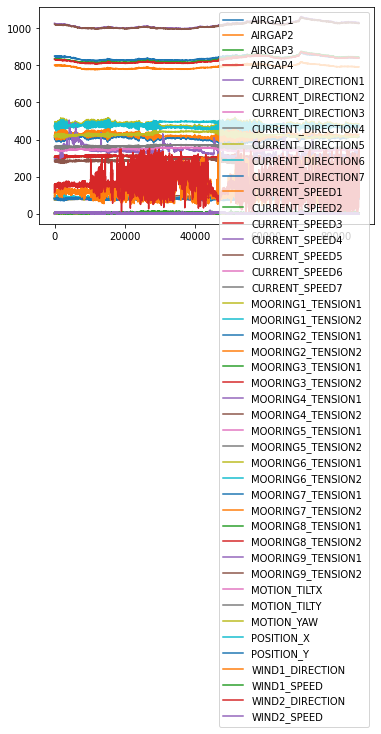

In [3]:
df4.plot()

Text(0.5, 1.0, '2015/09/11')

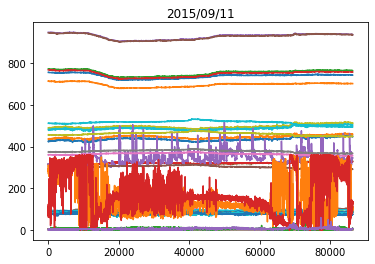

In [6]:
df5.plot(legend=None)
plt.title("2015/09/11")

In [46]:
X = df4.drop(["MOORING1_TENSION1"],axis=1)
y = df4["MOORING1_TENSION1"]
X_train = X.iloc[:69120,]
y_train = y.iloc[:69120,]
X_test = X.iloc[69120:,]
y_test = y.iloc[69120:,]

In [47]:
xg_model = xg.XGBRegressor(n_estimators=100, learning_rate=0.2, subsample=0.5,
                           colsample_bytree= 0.5,max_depth=6,seed = 1682) #,reg_lambda=1)
xg_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1,
             random_state=1682, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=1682, subsample=0.5, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
train = []
test = []
for i in [0.05,0.06,0.07,0.08,0.09,0.2]:
    xg_model = xg.XGBRegressor(n_estimators=100, learning_rate=i, subsample=0.5,
                           colsample_bytree= 0.5,max_depth=6,seed = 1682) #,reg_lambda=1)
    xg_model.fit(X_train,y_train)
    r_sq_train = xg_model.score(X_train,y_train) * 100
    r_sq_test = xg_model.score(X_test,y_test) * 100
    train.append(r_sq_train)
    test.append(r_sq_test)

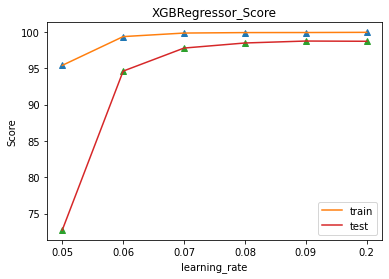

In [49]:
x = [0.05,0.06,0.07,0.08,0.09,0.2]
values = range(len(x))
plt.plot(train,"^")
plt.plot(train, label = "train")
plt.plot(test,"^")
plt.plot(test, label = "test")
plt.legend()
plt.title("XGBRegressor_Score")
plt.xticks(values,x)
plt.xlabel("learning_rate")
plt.ylabel("Score")
plt.show()

In [50]:
r_sq_train = xg_model.score(X_train,y_train)
r_sq_test = xg_model.score(X_test,y_test)
print(r_sq_train,r_sq_test)

0.9994291378742685 0.987126730019383


In [51]:
X = df5.drop(["MOORING1_TENSION1"],axis=1)
y = df5["MOORING1_TENSION1"]
X_train = X.iloc[:69120,]
y_train = y.iloc[:69120,]
X_test = X.iloc[69120:,]
y_test = y.iloc[69120:,]

In [52]:
predictions = xg_model.predict(X_test)

In [53]:
print(explained_variance_score(predictions,y_test))

0.9545890388909276


In [ ]:
score = []
for i in range(1,100):
    X = df4.drop(["MOORING1_TENSION1"],axis=1)
    y = df4["MOORING1_TENSION1"]
    X_train = X.iloc[:69120,]
    y_train = y.iloc[:69120,]
    X_test = X.iloc[69120:,]
    y_test = y.iloc[69120:,]
    xg_model = xg.XGBRegressor(n_estimators=100, learning_rate=0.2, subsample=0.5,
                           colsample_bytree= 0.5,max_depth=6,seed = i) #,reg_lambda=1)
    xg_model.fit(X_train,y_train)
    X = df5.drop(["MOORING1_TENSION1"],axis=1)
    y = df5["MOORING1_TENSION1"]
    X_train = X.iloc[:69120,]
    y_train = y.iloc[:69120,]
    X_test = X.iloc[69120:,]
    y_test = y.iloc[69120:,]
    predictions = xg_model.predict(X_test)
    score.append(explained_variance_score(predictions,y_test))

In [ ]:
score.index(0.9545890388909276)

In [ ]:
1683

In [54]:
num1 = np.linspace(0,17279,17280)
num2 = np.linspace(0,69119,69120)

In [ ]:
predictions

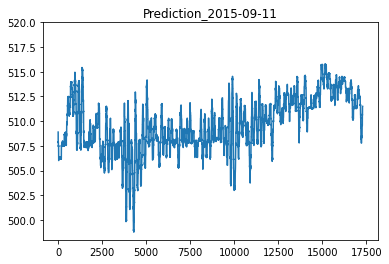

In [60]:
plt.plot(num1,predictions)
plt.title("Prediction_2015-09-11")
plt.ylim(498,520)
plt.show()

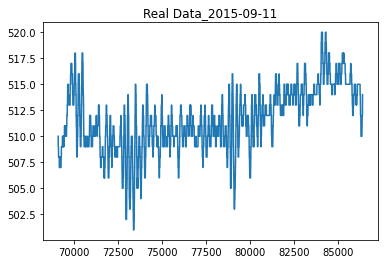

In [61]:
y[69120:].plot()
plt.title("Real Data_2015-09-11")
plt.show()

## 하이퍼파라메터 찾기

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 250],
    'learning_rate': [0.05,0.2],
    'max_depth': [3, 6, 9],
    'lambda': [1,10],
    'sub_sample': [0.4,0.7],
    'colsample_bytree': [0.3,0.9],
}

estimator = xg.XGBRegressor()

kf = KFold(random_state=30,
           n_splits=4,
           shuffle=True,
          )

grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(X_train, y_train)
grid_search.best_params_